In [1]:
import os
import pdfplumber
import time
import json
import pandas as pd

In [2]:
%run ../utils/extract_text_util.ipynb
%run ../utils/save_and_load_util.ipynb
%run ../utils/eda_util.ipynb

In [20]:
folder_path = "../../../datasets"
pdf_texts = extract_text_from_pdfs_with_progress(folder_path)

Processing 1910 PDF files...
[0.05%] Completed 1/1910 files. Elapsed time: 0.86s
[0.10%] Completed 2/1910 files. Elapsed time: 22.05s
[0.16%] Completed 3/1910 files. Elapsed time: 23.57s
[0.21%] Completed 4/1910 files. Elapsed time: 24.34s
[0.26%] Completed 5/1910 files. Elapsed time: 25.20s
[0.31%] Completed 6/1910 files. Elapsed time: 25.65s
[0.37%] Completed 7/1910 files. Elapsed time: 26.04s
[0.42%] Completed 8/1910 files. Elapsed time: 27.11s
[0.47%] Completed 9/1910 files. Elapsed time: 27.77s
[0.52%] Completed 10/1910 files. Elapsed time: 28.66s
[0.58%] Completed 11/1910 files. Elapsed time: 30.10s
[0.63%] Completed 12/1910 files. Elapsed time: 32.43s
[0.68%] Completed 13/1910 files. Elapsed time: 33.71s
[0.73%] Completed 14/1910 files. Elapsed time: 34.97s
[0.79%] Completed 15/1910 files. Elapsed time: 35.79s
[0.84%] Completed 16/1910 files. Elapsed time: 36.92s
[0.89%] Completed 17/1910 files. Elapsed time: 37.50s
[0.94%] Completed 18/1910 files. Elapsed time: 38.51s
[0.99%] C

In [9]:
print(pdf_texts)

{}


In [3]:
# Save the PDF texts
output_file_json = "pdf_texts.json"
save_as_json(pdf_texts, output_file_json)

NameError: name 'pdf_texts' is not defined

In [3]:
# Load the PDF texts
loaded_texts_json = load_from_json("pdf_texts.json")

Data loaded from pdf_texts.json.


In [4]:
if isinstance(loaded_texts_json, list):  # Case 1: List of dictionaries
    df = pd.DataFrame(loaded_texts_json)
elif isinstance(loaded_texts_json, dict):  # Case 2: Dictionary of scalars
    df = pd.DataFrame([
        {"file_name": key, "text": value} for key, value in loaded_texts_json.items()
    ])
else:
    raise ValueError("Unsupported JSON structure!")

In [5]:
print("DataFrame Preview:")
print(df.head())

DataFrame Preview:
                       file_name  \
0                     012009.pdf   
1           01a_01f_2017_tab.pdf   
2  101_2013_schccala_caption.pdf   
3  102_2013_schccala_caption.pdf   
4  103_2013_schccala_caption.pdf   

                                                text  
0  IN THE SUPREME COURT OF THE DEMOCRATIC SOCIALI...  
1  IN THE SUPREME COURT OF THE DEMOCRATIC SOCIALI...  
2  SC. HC. CA. LA. No. 101/2013\nIN THE SUPREME C...  
3  SC. HC. CA. LA. No. 102/2013\nIN THE SUPREME C...  
4  SC. HC. CA. LA. No. 103/2013\nIN THE SUPREME C...  


In [10]:
# Convert to DataFrame
df = pd.DataFrame(df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1910 non-null   object
 1   text       1910 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB
None

Missing Values:
file_name    0
text         0
dtype: int64

Descriptive Statistics:
count      1910.000000
mean      25416.589529
std       33725.669092
min           0.000000
25%       12254.250000
50%       18948.000000
75%       29011.750000
max      596673.000000
Name: text, dtype: float64


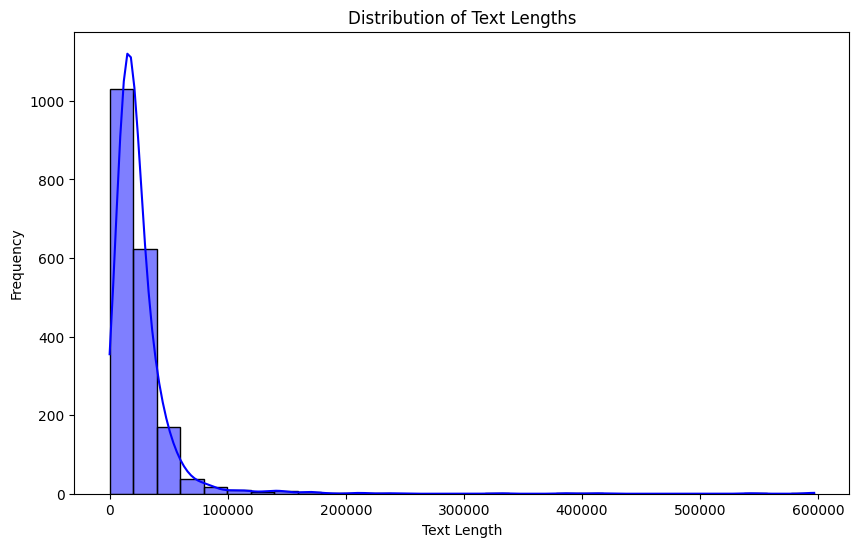


Longest Text File:
sc_fr_446_19-1.pdf

Shortest Text File:
sc_hc_la_89_2022.pdf


In [13]:
# Perform EDA
df = perform_eda(df)

In [6]:
# Check for duplicate texts
duplicate_texts = df.duplicated(subset=["text"], keep=False)
print(f"\nNumber of duplicate texts: {duplicate_texts.sum()}")


Number of duplicate texts: 398


In [7]:
# Save cleaned data
df.to_csv("eda_law_cases.csv", index=False)
print("\nEDA completed. Data saved to 'eda_law_cases.csv'.")


EDA completed. Data saved to 'eda_law_cases.csv'.
